In [1]:
from connec_functions import execute_to_df, generate_sparql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import warnings

#warnings.filterwarnings('ignore')

## Number of publications

In this part, we analyse the publications that are included in the LifeWatch special collections.

In [2]:
publication_info = execute_to_df("1_publication.sparql")
publication_info

,publication,type,publish_date,special_collection
0,https://marineinfo.org/id/publication/244397,Journal article,2015-01-01,https://marineinfo.org/id/collection/919
1,https://marineinfo.org/id/publication/244397,Journal article,2015-01-01,https://marineinfo.org/id/collection/945
2,https://marineinfo.org/id/publication/244397,Journal article,2015-01-01,https://marineinfo.org/id/collection/923
3,https://marineinfo.org/id/publication/244397,Journal article,2015-01-01,https://marineinfo.org/id/collection/941
4,https://marineinfo.org/id/publication/244397,Journal article,2015-01-01,https://marineinfo.org/id/collection/793
...,...,...,...,...
53260,https://marineinfo.org/id/publication/43261,Journal,NaN,https://marineinfo.org/id/collection/805
53261,https://marineinfo.org/id/publication/43261,Journal,NaN,https://marineinfo.org/id/collection/130
53262,https://marineinfo.org/id/publication/43261,Journal,NaN,https://marineinfo.org/id/collection/266
53263,https://marineinfo.org/id/publication/42768,Journal,NaN,https://marineinfo.org/id/collection/805


In [3]:
publications = publication_info.groupby('publication').nunique()

In [4]:
print(f'There are {publications.shape[0]} publications in the LifeWatch special collections.')
publications

There are 10700 publications in the LifeWatch special collections.


,type,publish_date,special_collection
publication,,,
https://marineinfo.org/id/publication/100077,1,1,5
https://marineinfo.org/id/publication/100293,1,1,13
https://marineinfo.org/id/publication/100295,1,1,8
https://marineinfo.org/id/publication/100297,1,1,11
https://marineinfo.org/id/publication/100343,1,1,9
...,...,...,...
https://marineinfo.org/id/publication/99798,1,1,5
https://marineinfo.org/id/publication/99812,1,0,1
https://marineinfo.org/id/publication/99962,1,1,10


#### Number of publications within defined tempo

In [5]:
# set date range
START_YEAR = 2012
END_YEAR = 2024

In [6]:
# manipulate date datatype
publication_info['publish_date'] = pd.to_datetime(publication_info['publish_date'])
publication_info['publish_year'] = publication_info['publish_date'].dt.year

In [7]:
# assess publications with missing publish_date
pubs_with_missing_publish_year = len(publication_info[publication_info['publish_year'].isnull()])
print(f'number of publications with missing publish date: {pubs_with_missing_publish_year}')

number of publications with missing publish date: 431


In [8]:
# replace all NaN values with zeros & convert from float to int
publication_info['publish_year'] = publication_info['publish_year'].fillna(0).astype(int)

In [9]:
# select date range
publication_info_12_24 = publication_info[ (publication_info['publish_year'] >= START_YEAR) & (publication_info['publish_year'] <= END_YEAR) ]
publication_info_12_24

,publication,type,publish_date,special_collection,publish_year
0,https://marineinfo.org/id/publication/244397,Journal article,2015-01-01,https://marineinfo.org/id/collection/919,2015
1,https://marineinfo.org/id/publication/244397,Journal article,2015-01-01,https://marineinfo.org/id/collection/945,2015
2,https://marineinfo.org/id/publication/244397,Journal article,2015-01-01,https://marineinfo.org/id/collection/923,2015
3,https://marineinfo.org/id/publication/244397,Journal article,2015-01-01,https://marineinfo.org/id/collection/941,2015
4,https://marineinfo.org/id/publication/244397,Journal article,2015-01-01,https://marineinfo.org/id/collection/793,2015
...,...,...,...,...,...
53197,https://marineinfo.org/id/publication/310218,Book/Monograph,2019-01-01,NaN,2019
53198,https://marineinfo.org/id/publication/314397,Book/Monograph,2019-01-01,NaN,2019
53237,https://marineinfo.org/id/publication/355622,Book/Monograph,2022-01-01,https://marineinfo.org/id/collection/676,2022
53240,https://marineinfo.org/id/publication/336685,Book/Monograph,2021-01-01,NaN,2021


In [10]:
publications_12_24 = publication_info_12_24.groupby('publication').nunique()
print(f'There are {publications_12_24.shape[0]} publications withing the defined time range.')

There are 9641 publications withing the defined time range.


In [11]:
# calculate number & cummulative number of publications per publish year 
pubs_per_publishyear = publication_info_12_24.groupby('publish_year').nunique()
pubs_per_publishyear['publication_cumsum'] = pubs_per_publishyear['publication'].cumsum(skipna=False)

In [12]:
# Table
pubs_per_publishyear.rename(columns={
    'publication': 'Number of publications', 
    'publication_cumsum': 'Cummulative number of publications'}, inplace=True)

pubs_per_publishyear.transpose()

publish_year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Number of publications,224,334,372,372,326,442,892,1040,1288,1362,1244,1432,313
type,6,6,6,6,7,7,7,7,7,7,6,6,4
publish_date,1,1,1,1,1,1,1,1,1,1,1,1,1
special_collection,43,54,53,63,56,50,60,50,62,51,46,50,25
Cummulative number of publications,224,558,930,1302,1628,2070,2962,4002,5290,6652,7896,9328,9641


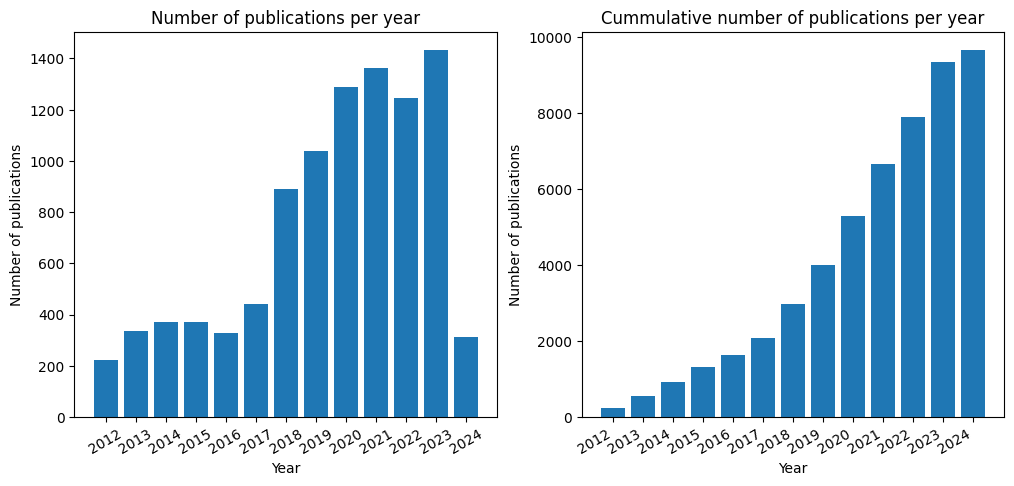

In [13]:
warnings.filterwarnings('ignore')
# Horizontal barplot of number of publiations per publish year
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].bar(pubs_per_publishyear.index.astype(str), pubs_per_publishyear['Number of publications'])
ax[0].set_title('Number of publications per year')
ax[0].set_ylabel('Number of publications')
ax[0].set_xlabel('Year')
ax[0].set_xticklabels(pubs_per_publishyear.index.astype(str), rotation=30)

ax[1].bar(pubs_per_publishyear.index.astype(str), pubs_per_publishyear['Cummulative number of publications'])
ax[1].set_title('Cummulative number of publications per year')
ax[1].set_ylabel('Number of publications')
ax[1].set_xlabel('Year')
ax[1].set_xticklabels(pubs_per_publishyear.index.astype(str), rotation=30, ha='right')

plt.show()